# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [3]:
# import python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# import distortion filters and utilitary functions
from distortions import add_gaussian, zoom_image, add_gaussian_noise
from utils import get_dataset_from_folders, get_binary_predictions, get_number_cells, compute_jaccard_score
from plots import show_image_mask, show_image_pred, plot_all

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### $\bullet$ Setting size of the input image and different paths

In [4]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [5]:
def evaluation_summary(accuracy, jaccard, n_cells_pred, n_cells_masks, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print(f"Accuracy                      : {accuracy}")
    print(f"Average Jaccard score         : {jaccard}")
    print(f"Number of cells in predictions: {n_cells_pred}")
    print(f"Number of cells in masks      : {n_cells_masks}")
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy = np.mean(predictions==masks)
    jaccard_score = compute_jaccard_score(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return accuracy, jaccard_score, number_cells_predictions, number_cells_masks

### $\bullet$ Retrieve trained model

In [6]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Get input images with the wanted shape from dataset

In [7]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images.
16289 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

Accuracy                      : 0.2764683742149203
Average Jaccard score         : 0.08710390531556116
Number of cells in predictions: 14968
Number of cells in masks      : 16289


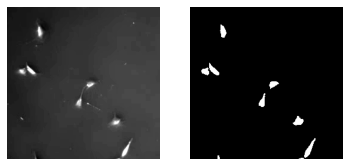

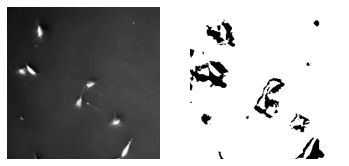

KeyboardInterrupt: 

In [9]:
amplitudes = np.linspace(0, 4000, 41)
accuracies = []
jaccard_scores = []
number_cells_predictions = []
for amplitude in amplitudes:
    added_gaussian_test_images = []
    
    for image in test_images:
        added_gaussian_test_images.append(add_gaussian(image, amplitude))
    
    accuracy, jaccard, n_cells_pred, _ = evaluate_model(np.array(added_gaussian_test_images), test_masks, model, number_cells_masks)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    
    evaluation_summary(accuracy, jaccard, n_cells_pred, number_cells_masks, test_images[0], test_masks[0], added_gaussian_test_images[0], model)
    
plot_all(amplitudes, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks)

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

Accuracy                      : 0.9848178339939492
Average Jaccard score         : 0.8093038538354007
Number of cells in predictions: 18331
Number of cells in masks      : 16184


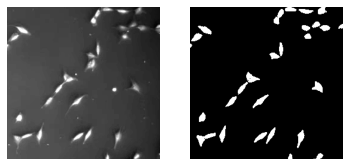

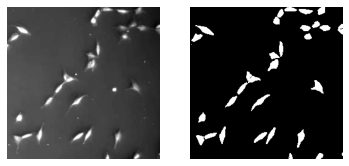

Accuracy                      : 0.9852032829733456
Average Jaccard score         : 0.8087422586948046
Number of cells in predictions: 19408
Number of cells in masks      : 16184


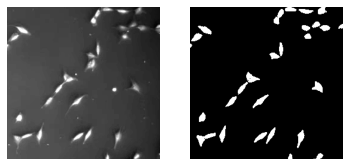

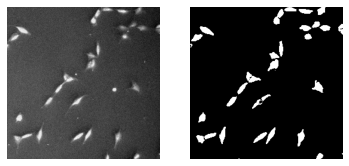

Accuracy                      : 0.9811951880361519
Average Jaccard score         : 0.7581854578858624
Number of cells in predictions: 29149
Number of cells in masks      : 16184


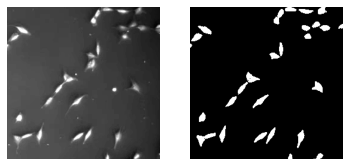

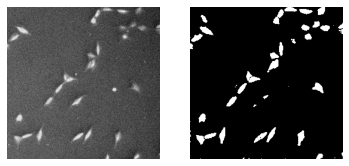

Accuracy                      : 0.973839584051394
Average Jaccard score         : 0.6778846276917044
Number of cells in predictions: 42706
Number of cells in masks      : 16184


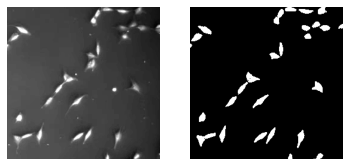

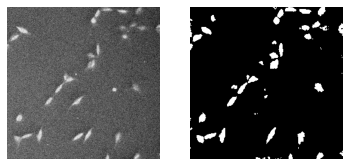

Accuracy                      : 0.9658421535117954
Average Jaccard score         : 0.6008706606671587
Number of cells in predictions: 57400
Number of cells in masks      : 16184


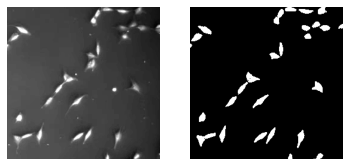

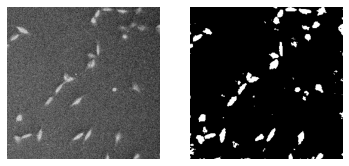

Accuracy                      : 0.9571500591203278
Average Jaccard score         : 0.5287513642225962
Number of cells in predictions: 72817
Number of cells in masks      : 16184


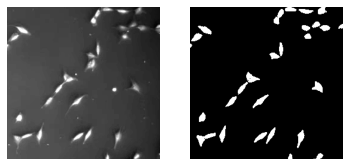

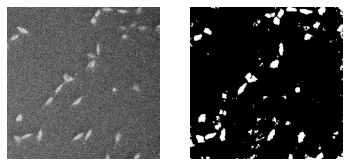

Accuracy                      : 0.9489752675972732
Average Jaccard score         : 0.4657465388698833
Number of cells in predictions: 88465
Number of cells in masks      : 16184


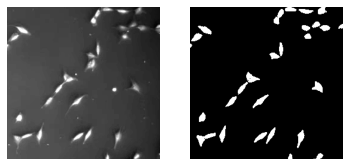

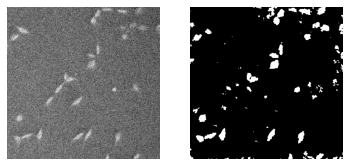

Accuracy                      : 0.9409938438265931
Average Jaccard score         : 0.4125404462813812
Number of cells in predictions: 104981
Number of cells in masks      : 16184


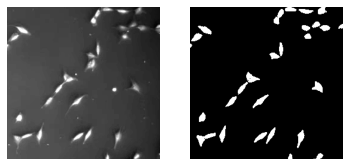

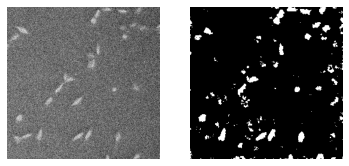

Accuracy                      : 0.9342018277037377
Average Jaccard score         : 0.36753969697819133
Number of cells in predictions: 118536
Number of cells in masks      : 16184


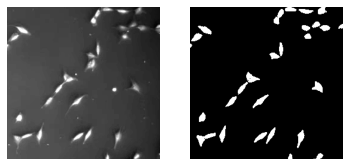

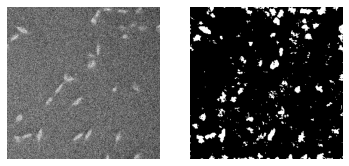

Accuracy                      : 0.9276790843290441
Average Jaccard score         : 0.3297385866891797
Number of cells in predictions: 131873
Number of cells in masks      : 16184


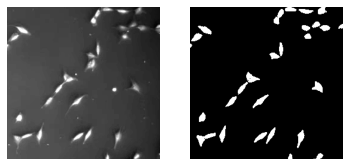

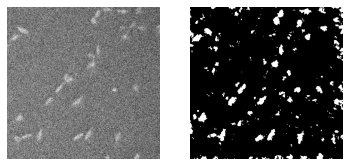

Accuracy                      : 0.9218178543390012
Average Jaccard score         : 0.29563943213470995
Number of cells in predictions: 143114
Number of cells in masks      : 16184


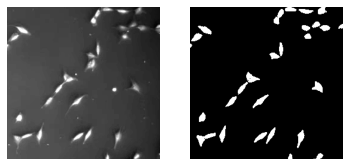

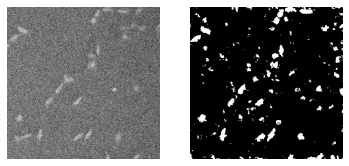

Accuracy                      : 0.9165964163985907
Average Jaccard score         : 0.27105577687445687
Number of cells in predictions: 154698
Number of cells in masks      : 16184


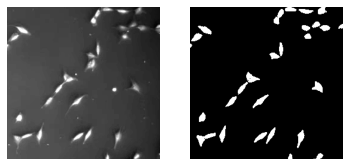

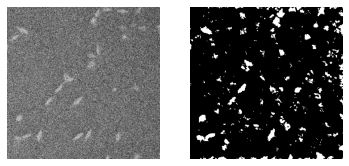

Accuracy                      : 0.9113120883118873
Average Jaccard score         : 0.24659050401813504
Number of cells in predictions: 164726
Number of cells in masks      : 16184


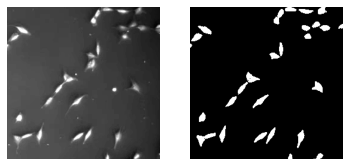

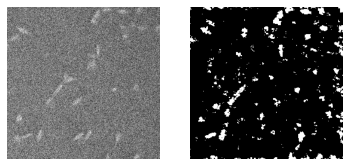

Accuracy                      : 0.9090217141544118
Average Jaccard score         : 0.22563737978130405
Number of cells in predictions: 168032
Number of cells in masks      : 16184


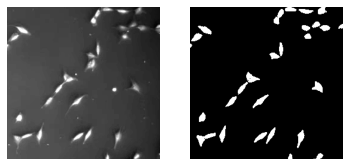

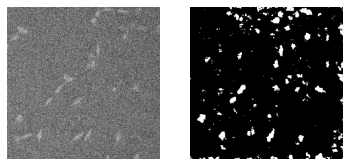

Accuracy                      : 0.9048468496285232
Average Jaccard score         : 0.20692705900027114
Number of cells in predictions: 174097
Number of cells in masks      : 16184


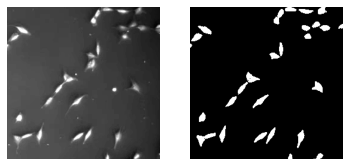

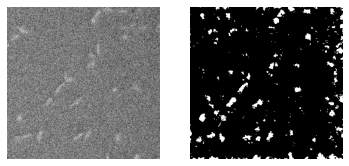

Accuracy                      : 0.900329350490196
Average Jaccard score         : 0.19163507668803695
Number of cells in predictions: 184639
Number of cells in masks      : 16184


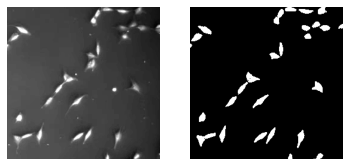

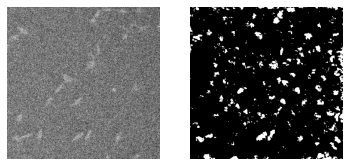

Accuracy                      : 0.8970699534696691
Average Jaccard score         : 0.17851638818101975
Number of cells in predictions: 191757
Number of cells in masks      : 16184


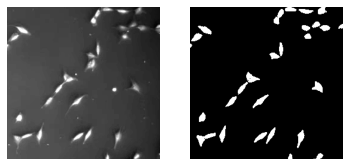

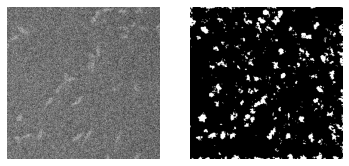

Accuracy                      : 0.8953462488511029
Average Jaccard score         : 0.16414176227002003
Number of cells in predictions: 192429
Number of cells in masks      : 16184


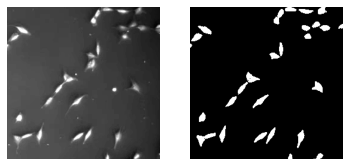

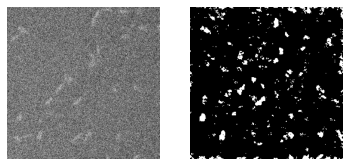

Accuracy                      : 0.8934111352060355
Average Jaccard score         : 0.1572692584496717
Number of cells in predictions: 197993
Number of cells in masks      : 16184


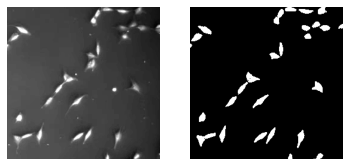

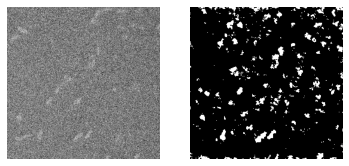

Accuracy                      : 0.8912866330614277
Average Jaccard score         : 0.14751904668146218
Number of cells in predictions: 198695
Number of cells in masks      : 16184


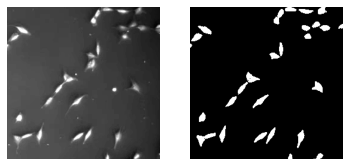

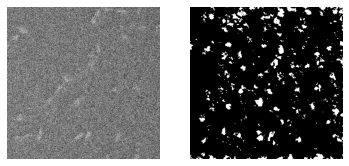

Accuracy                      : 0.8883862364525889
Average Jaccard score         : 0.13793261903677098
Number of cells in predictions: 205613
Number of cells in masks      : 16184


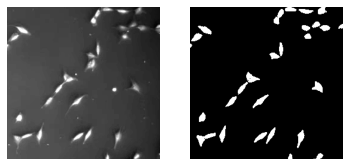

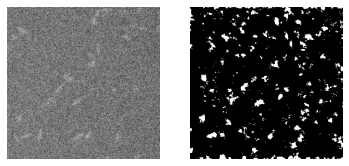

Accuracy                      : 0.886526549096201
Average Jaccard score         : 0.13267488095203522
Number of cells in predictions: 211765
Number of cells in masks      : 16184


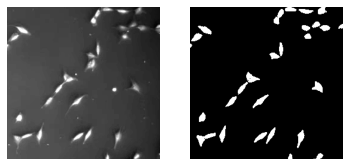

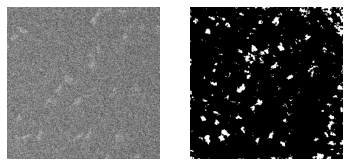

Accuracy                      : 0.8863733927408854
Average Jaccard score         : 0.12689816114982166
Number of cells in predictions: 209430
Number of cells in masks      : 16184


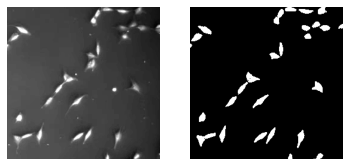

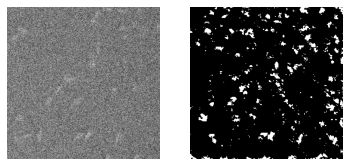

Accuracy                      : 0.8851708804859835
Average Jaccard score         : 0.1206882997839183
Number of cells in predictions: 209550
Number of cells in masks      : 16184


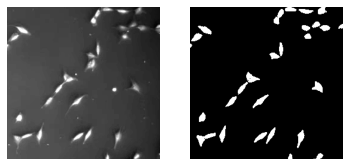

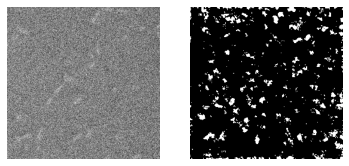

Accuracy                      : 0.8836850035424326
Average Jaccard score         : 0.1159795343909918
Number of cells in predictions: 213098
Number of cells in masks      : 16184


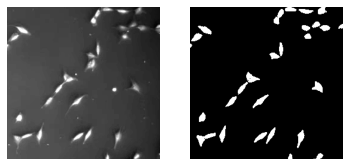

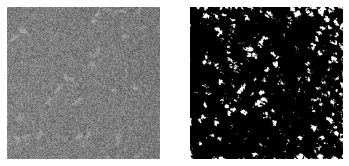

Accuracy                      : 0.8821648392022825
Average Jaccard score         : 0.1114404577688541
Number of cells in predictions: 215011
Number of cells in masks      : 16184


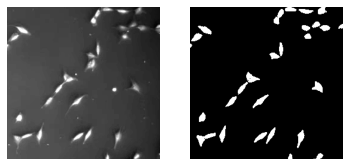

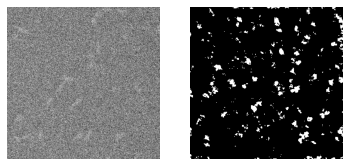

Accuracy                      : 0.8801544189453125
Average Jaccard score         : 0.10548985233557263
Number of cells in predictions: 220464
Number of cells in masks      : 16184


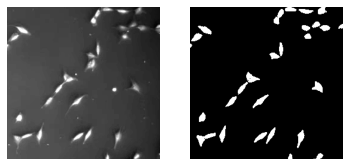

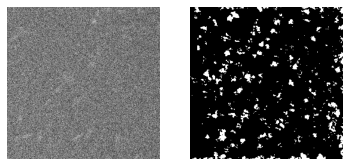

Accuracy                      : 0.880644016639859
Average Jaccard score         : 0.10266509011043222
Number of cells in predictions: 217168
Number of cells in masks      : 16184


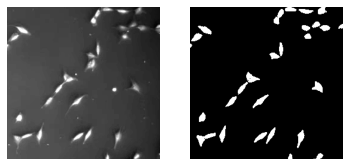

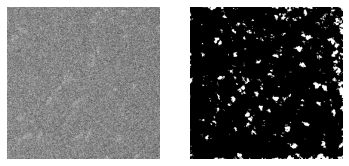

Accuracy                      : 0.8799904916800705
Average Jaccard score         : 0.10015577957207437
Number of cells in predictions: 219498
Number of cells in masks      : 16184


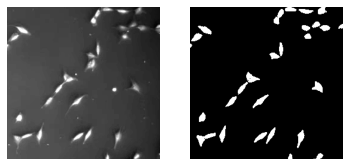

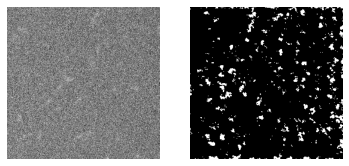

Accuracy                      : 0.8797762702493107
Average Jaccard score         : 0.09527373541067083
Number of cells in predictions: 217414
Number of cells in masks      : 16184


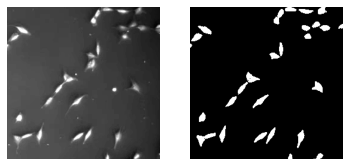

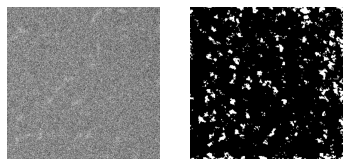

Accuracy                      : 0.8778247010474112
Average Jaccard score         : 0.09407690890664859
Number of cells in predictions: 222413
Number of cells in masks      : 16184


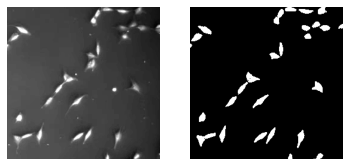

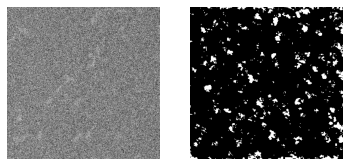

Accuracy                      : 0.8777388030407476
Average Jaccard score         : 0.09030414393025499
Number of cells in predictions: 221149
Number of cells in masks      : 16184


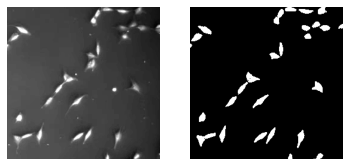

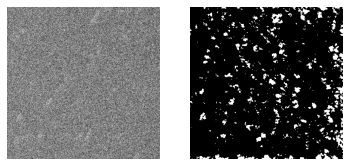

Accuracy                      : 0.8770296283796721
Average Jaccard score         : 0.0879565342828552
Number of cells in predictions: 221422
Number of cells in masks      : 16184


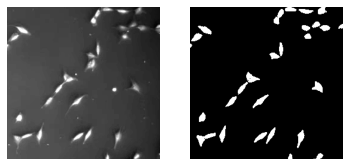

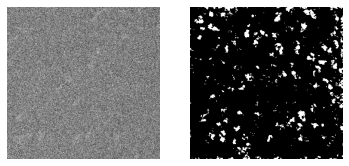

Accuracy                      : 0.8763693117627911
Average Jaccard score         : 0.08504172996028589
Number of cells in predictions: 222569
Number of cells in masks      : 16184


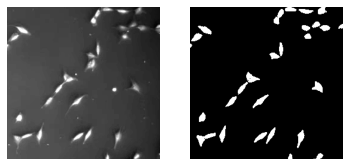

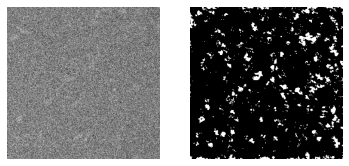

Accuracy                      : 0.876936310412837
Average Jaccard score         : 0.08380674491413512
Number of cells in predictions: 221823
Number of cells in masks      : 16184


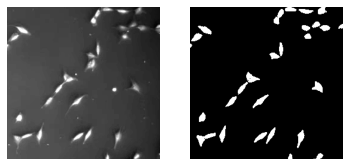

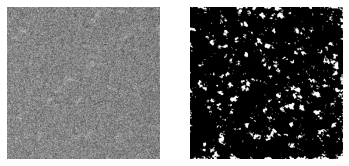

Accuracy                      : 0.874936840580959
Average Jaccard score         : 0.08063117722054013
Number of cells in predictions: 226050
Number of cells in masks      : 16184


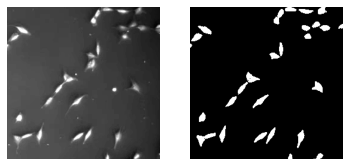

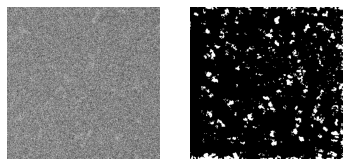

Accuracy                      : 0.8752764533547794
Average Jaccard score         : 0.0793258925834841
Number of cells in predictions: 223221
Number of cells in masks      : 16184


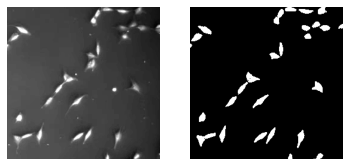

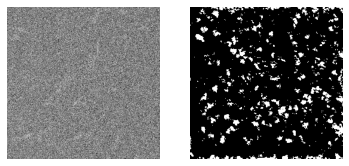

Accuracy                      : 0.8752587411917893
Average Jaccard score         : 0.07821281765348978
Number of cells in predictions: 224674
Number of cells in masks      : 16184


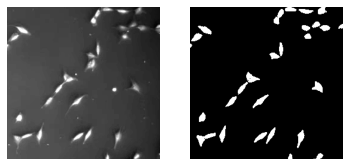

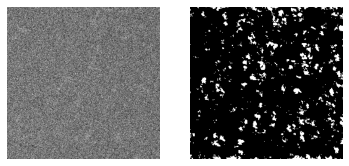

Accuracy                      : 0.8739484300800399
Average Jaccard score         : 0.07633682042045803
Number of cells in predictions: 226329
Number of cells in masks      : 16184


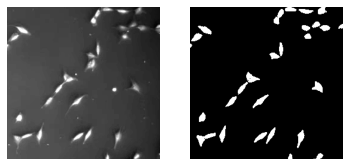

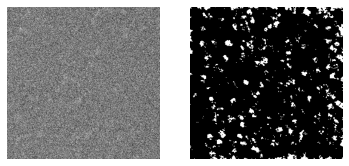

Accuracy                      : 0.8735574161305147
Average Jaccard score         : 0.07641452231923056
Number of cells in predictions: 227810
Number of cells in masks      : 16184


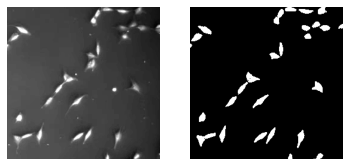

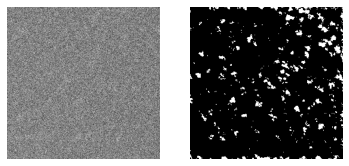

Accuracy                      : 0.8730641383750766
Average Jaccard score         : 0.07322003171742224
Number of cells in predictions: 227378
Number of cells in masks      : 16184


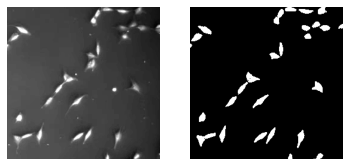

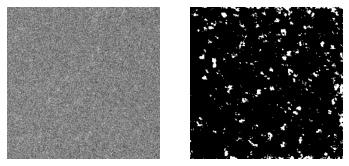

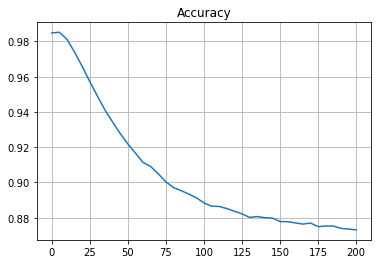

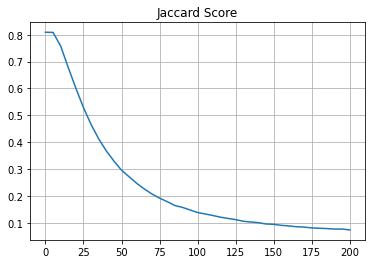

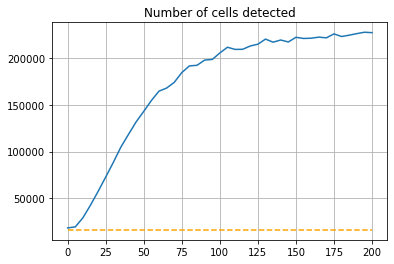

In [9]:
mean = 0
sigmas = np.linspace(0, 200, 41)
accuracies = []
jaccard_scores = []
number_cells_predictions = []
for sigma in sigmas:
    noisy_test_images = []

    for image in test_images:
        noisy_test_images.append(add_gaussian_noise(image, mean, sigma))

    accuracy, jaccard, n_cells_pred, _ = evaluate_model(np.array(noisy_test_images), test_masks, model, number_cells_masks)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    
    evaluation_summary(accuracy, jaccard, n_cells_pred, number_cells_masks, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_all(sigmas, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks)

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

In [ ]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Accuracy                      : 0.9955445233513327
Average Jaccard score         : 0.06446816018102414
Number of cells in predictions: 1390
Number of cells in masks      : 10279


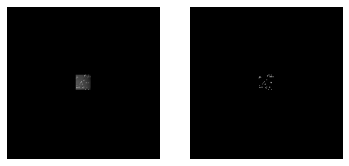

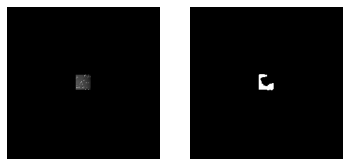

Accuracy                      : 0.992944575291054
Average Jaccard score         : 0.07676440079134798
Number of cells in predictions: 2961
Number of cells in masks      : 12266


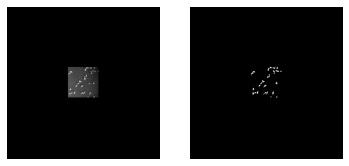

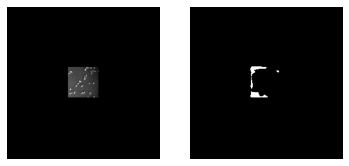

Accuracy                      : 0.9893762925091911
Average Jaccard score         : 0.09963617871840809
Number of cells in predictions: 4775
Number of cells in masks      : 13258


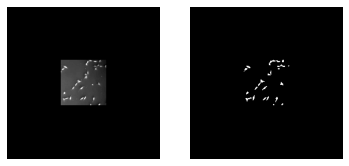

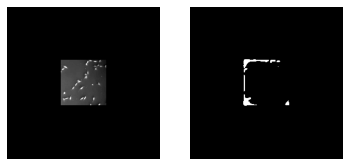

Accuracy                      : 0.9857285742666207
Average Jaccard score         : 0.1924195185647474
Number of cells in predictions: 7224
Number of cells in masks      : 14025


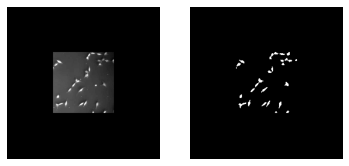

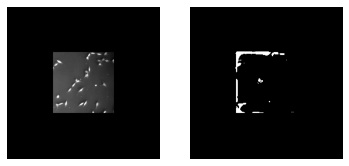

Accuracy                      : 0.9812038945216759
Average Jaccard score         : 0.3226086758158872
Number of cells in predictions: 11046
Number of cells in masks      : 14691


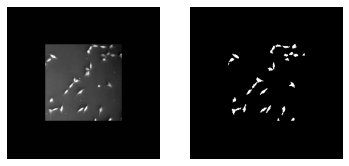

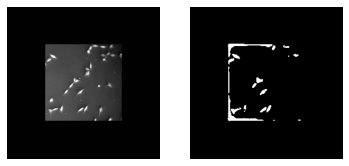

Accuracy                      : 0.9796396292892157
Average Jaccard score         : 0.4875276599217734
Number of cells in predictions: 13762
Number of cells in masks      : 15183


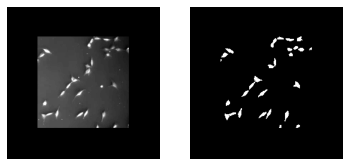

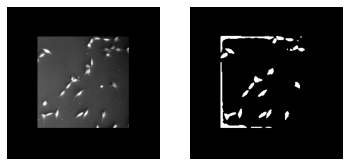

Accuracy                      : 0.9810673732383578
Average Jaccard score         : 0.6159440187298373
Number of cells in predictions: 15371
Number of cells in masks      : 15497


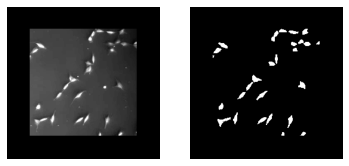

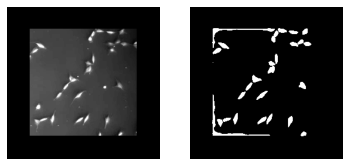

Accuracy                      : 0.9793697282379749
Average Jaccard score         : 0.661877699962699
Number of cells in predictions: 16799
Number of cells in masks      : 15737


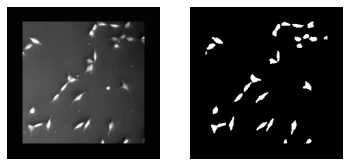

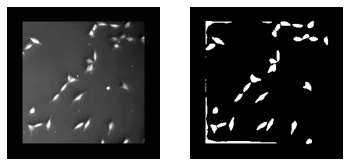

Accuracy                      : 0.9779035680434283
Average Jaccard score         : 0.6995501358957601
Number of cells in predictions: 17452
Number of cells in masks      : 15993


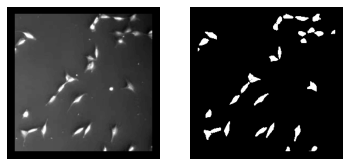

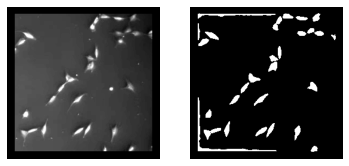

Accuracy                      : 0.9838144938151042
Average Jaccard score         : 0.7989220613468561
Number of cells in predictions: 18086
Number of cells in masks      : 16270


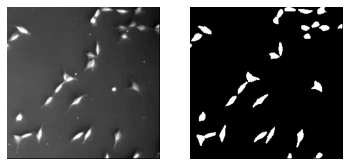

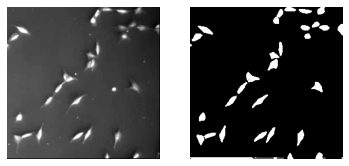

Accuracy                      : 0.9884084664139093
Average Jaccard score         : 0.8435736475375359
Number of cells in predictions: 14476
Number of cells in masks      : 13783


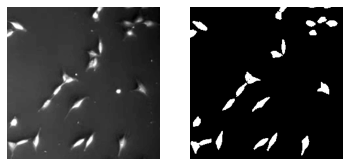

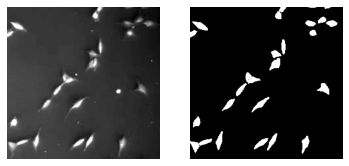

Accuracy                      : 0.9871517106598499
Average Jaccard score         : 0.8230457166638737
Number of cells in predictions: 12652
Number of cells in masks      : 11885


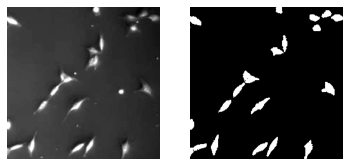

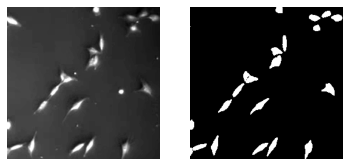

Accuracy                      : 0.9850638894473805
Average Jaccard score         : 0.7891463544766575
Number of cells in predictions: 11047
Number of cells in masks      : 10242


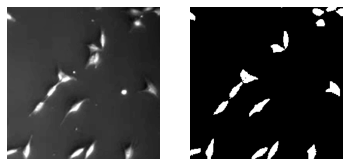

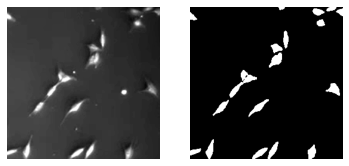

Accuracy                      : 0.9824833290249694
Average Jaccard score         : 0.7492265140209248
Number of cells in predictions: 10013
Number of cells in masks      : 9018


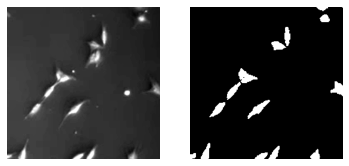

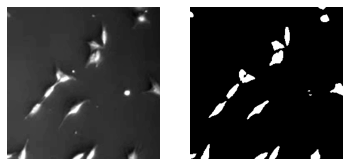

Accuracy                      : 0.9800737268784467
Average Jaccard score         : 0.7132249330689143
Number of cells in predictions: 9139
Number of cells in masks      : 8098


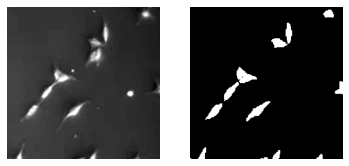

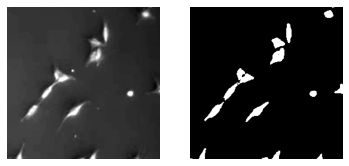

Accuracy                      : 0.977882115981158
Average Jaccard score         : 0.6766250103178785
Number of cells in predictions: 8318
Number of cells in masks      : 7164


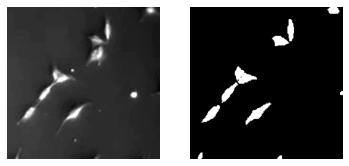

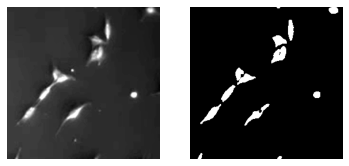

Accuracy                      : 0.97624885708678
Average Jaccard score         : 0.6553441813003772
Number of cells in predictions: 7571
Number of cells in masks      : 6411


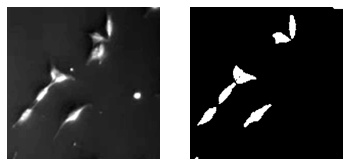

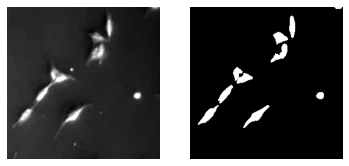

Accuracy                      : 0.9750583125095741
Average Jaccard score         : 0.6411187489747171
Number of cells in predictions: 7151
Number of cells in masks      : 5901


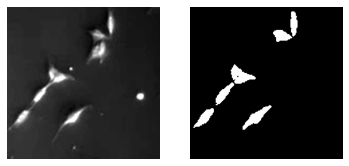

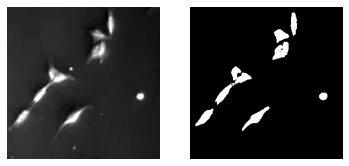

Accuracy                      : 0.9746185302734375
Average Jaccard score         : 0.6366887436393412
Number of cells in predictions: 6651
Number of cells in masks      : 5455


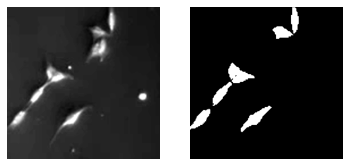

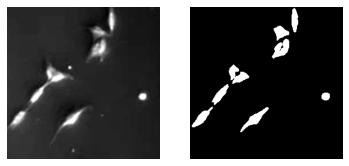

Accuracy                      : 0.9739869959214155
Average Jaccard score         : 0.6300450933326563
Number of cells in predictions: 6233
Number of cells in masks      : 4878


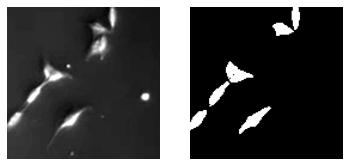

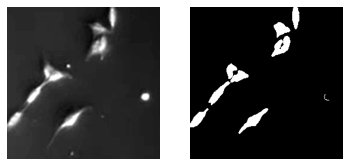

Accuracy                      : 0.9724367328718597
Average Jaccard score         : 0.6009724567072461
Number of cells in predictions: 4606
Number of cells in masks      : 3595


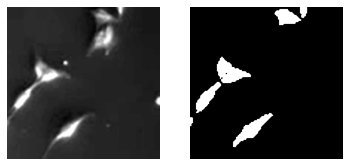

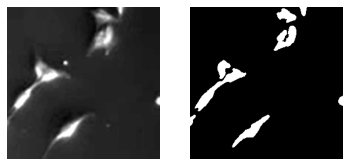

Accuracy                      : 0.9694708132276348
Average Jaccard score         : 0.5278385860234384
Number of cells in predictions: 3590
Number of cells in masks      : 2746


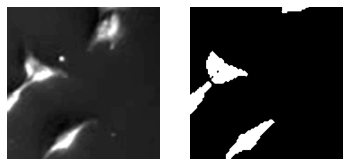

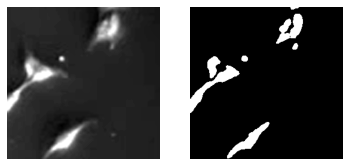

Accuracy                      : 0.9661433799594057
Average Jaccard score         : 0.4445051280839993
Number of cells in predictions: 2905
Number of cells in masks      : 2253


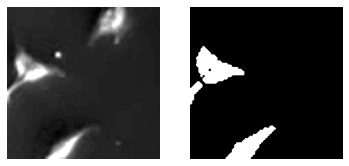

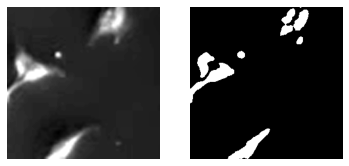

Accuracy                      : 0.9622622620825674
Average Jaccard score         : 0.3599819354596823
Number of cells in predictions: 2395
Number of cells in masks      : 1918


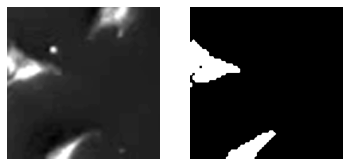

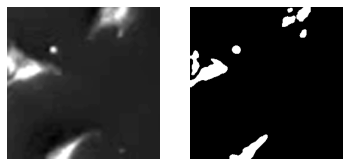

Accuracy                      : 0.9583418303844975
Average Jaccard score         : 0.29178571942286935
Number of cells in predictions: 2097
Number of cells in masks      : 1672


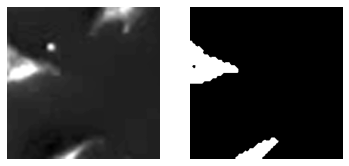

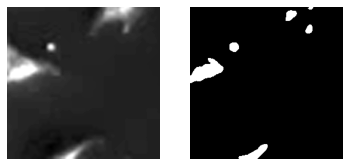

Accuracy                      : 0.9544851564893535
Average Jaccard score         : 0.23059104020761736
Number of cells in predictions: 1817
Number of cells in masks      : 1472


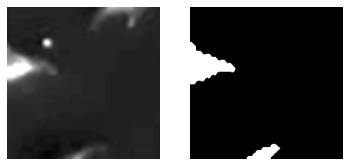

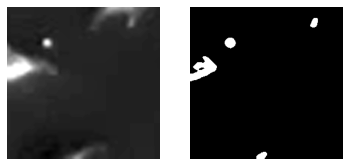

Accuracy                      : 0.9520969465667126
Average Jaccard score         : 0.18937171484732898
Number of cells in predictions: 1656
Number of cells in masks      : 1353


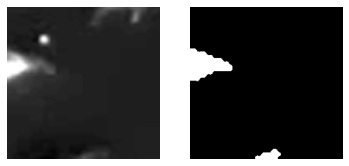

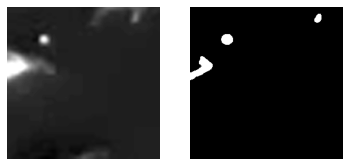

Accuracy                      : 0.9495083678002451
Average Jaccard score         : 0.14887086645651082
Number of cells in predictions: 1464
Number of cells in masks      : 1246


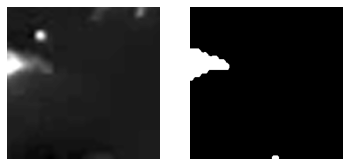

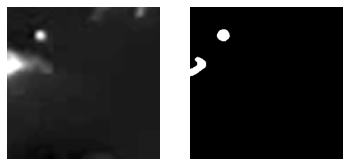

Accuracy                      : 0.9469121596392464
Average Jaccard score         : 0.10771188130303103
Number of cells in predictions: 1331
Number of cells in masks      : 1156


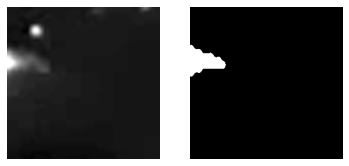

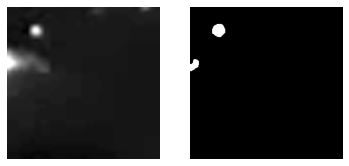

Accuracy                      : 0.9457070444144454
Average Jaccard score         : 0.08900360089996857
Number of cells in predictions: 1248
Number of cells in masks      : 1108


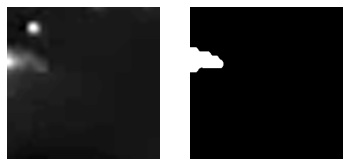

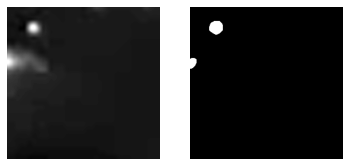

Accuracy                      : 0.9446016498640472
Average Jaccard score         : 0.0714345417024366
Number of cells in predictions: 1148
Number of cells in masks      : 1072


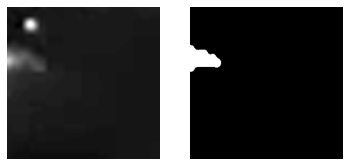

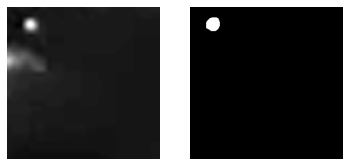

Accuracy                      : 0.9430442660462622
Average Jaccard score         : 0.048321635998895496
Number of cells in predictions: 1068
Number of cells in masks      : 1011


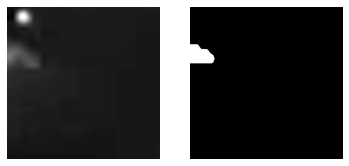

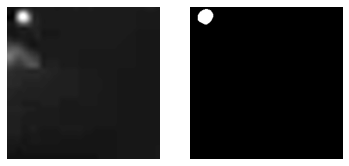

Accuracy                      : 0.9425410551183364
Average Jaccard score         : 0.04128006035219228
Number of cells in predictions: 1024
Number of cells in masks      : 995


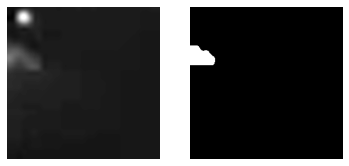

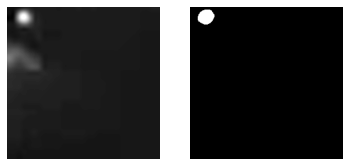

Accuracy                      : 0.9416827033547794
Average Jaccard score         : 0.029870389863169238
Number of cells in predictions: 934
Number of cells in masks      : 924


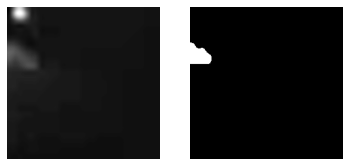

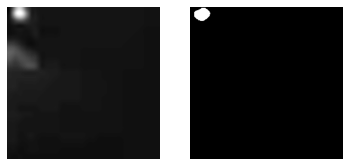

Accuracy                      : 0.9409785251991422
Average Jaccard score         : 0.020839433841723945
Number of cells in predictions: 855
Number of cells in masks      : 890


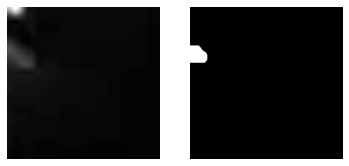

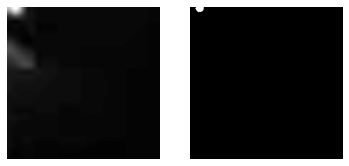

Accuracy                      : 0.9405988506242341
Average Jaccard score         : 0.01210723806810499
Number of cells in predictions: 765
Number of cells in masks      : 844


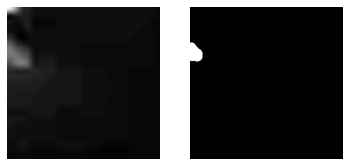

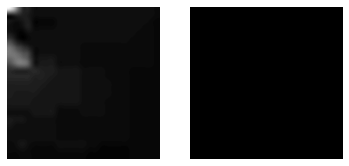

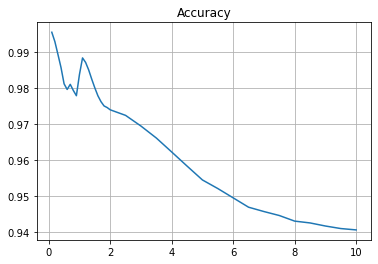

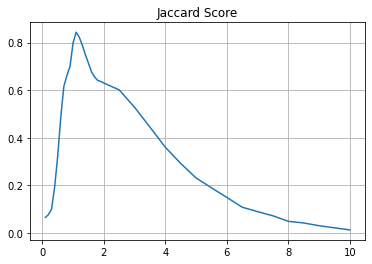

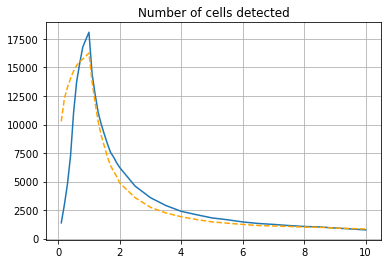

In [8]:
zooms = np.r_[np.linspace(0.1, 2, 19, endpoint=False), np.linspace(2, 10, 17)]
accuracies = []
jaccard_scores = []
number_cells_predictions = []
number_cells_masks_zoomed = []
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    for image, mask in zip(test_images, test_masks):
        zoomed_test_images.append(zoom_image(image, zoom))
        zoomed_test_masks.append(zoom_image(mask, zoom, val_padding=0))

    accuracy, jaccard, n_cells_pred, n_cells_masks = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    number_cells_masks_zoomed.append(n_cells_masks)
    
    evaluation_summary(accuracy, jaccard, n_cells_pred, n_cells_masks, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(zooms, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks_zoomed)